数据读取，注意图像的文件夹默认名称为 dataset

In [1]:
from data import DataKyrgyz
from time import  time

begin = time()

DATA = DataKyrgyz('dataset')

# 获取数据
x_train, y_train = DATA.get_train_data()
x_test, y_test = DATA.get_test_data()

dtime = time() - begin
print(dtime)

25.964033842086792


获取模型，设置优化器和学习率调整策略，编译模型

In [2]:
from model import *

def top5_accuracy(y_true, y_pred): return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)
# 学习率策略
def lr_scheduler(epoch):
    if epoch < 4: return 0.1
    return 0.4/(epoch+1)

lr_callback = keras.callbacks.LearningRateScheduler(lr_scheduler)

model = get_model(dropout=False, BN=False)
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy', top5_accuracy], optimizer='sgd')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [3]:
# 带有 dropout 的模型
model_dropout = get_model(dropout=True, BN=False)
model_dropout.summary()
model_dropout.compile(loss='categorical_crossentropy', metrics=['accuracy', top5_accuracy], optimizer='sgd')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        36928     
                                                      

In [4]:
# 带有 BN 的模型
model_BN = get_model(dropout=False, BN=True)
model_BN.summary()
model_BN.compile(loss='categorical_crossentropy', metrics=['accuracy', top5_accuracy], optimizer='sgd')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [5]:
# 两者都有的模型
model_dropoutBN = get_model(dropout=True, BN=True)
model_dropoutBN.compile(loss='categorical_crossentropy', metrics=['accuracy', top5_accuracy], optimizer='sgd')

训练

In [6]:
out = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=32, callbacks=[lr_callback])

Epoch 1/32
1947/1947 [==============================] - 14s 6ms/step - loss: 1.9022 - accuracy: 0.4845 - top5_accuracy: 0.6845 - val_loss: 0.7141 - val_accuracy: 0.8025 - val_top5_accuracy: 0.9480 - lr: 0.1000
Epoch 2/32
1947/1947 [==============================] - 11s 6ms/step - loss: 0.5601 - accuracy: 0.8422 - top5_accuracy: 0.9643 - val_loss: 0.4726 - val_accuracy: 0.8629 - val_top5_accuracy: 0.9712 - lr: 0.1000
Epoch 3/32
1947/1947 [==============================] - 12s 6ms/step - loss: 0.3868 - accuracy: 0.8882 - top5_accuracy: 0.9789 - val_loss: 0.3395 - val_accuracy: 0.9027 - val_top5_accuracy: 0.9814 - lr: 0.1000
Epoch 4/32
1947/1947 [==============================] - 11s 6ms/step - loss: 0.3031 - accuracy: 0.9119 - top5_accuracy: 0.9851 - val_loss: 0.3110 - val_accuracy: 0.9087 - val_top5_accuracy: 0.9858 - lr: 0.1000
Epoch 5/32
1947/1947 [==============================] - 11s 6ms/step - loss: 0.2374 - accuracy: 0.9301 - top5_accuracy: 0.9895 - val_loss: 0.2602 - val_accuracy

In [12]:
out_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=32, callbacks=[lr_callback])

Epoch 1/32
1947/1947 [==============================] - 12s 6ms/step - loss: 2.0617 - accuracy: 0.4365 - top5_accuracy: 0.6778 - val_loss: 0.7191 - val_accuracy: 0.8053 - val_top5_accuracy: 0.9505 - lr: 0.1000
Epoch 2/32
1947/1947 [==============================] - 12s 6ms/step - loss: 0.7854 - accuracy: 0.7738 - top5_accuracy: 0.9480 - val_loss: 0.4400 - val_accuracy: 0.8781 - val_top5_accuracy: 0.9737 - lr: 0.1000
Epoch 3/32
1947/1947 [==============================] - 12s 6ms/step - loss: 0.5834 - accuracy: 0.8291 - top5_accuracy: 0.9672 - val_loss: 0.3435 - val_accuracy: 0.8980 - val_top5_accuracy: 0.9817 - lr: 0.1000
Epoch 4/32
1947/1947 [==============================] - 12s 6ms/step - loss: 0.4811 - accuracy: 0.8572 - top5_accuracy: 0.9757 - val_loss: 0.2983 - val_accuracy: 0.9128 - val_top5_accuracy: 0.9851 - lr: 0.1000
Epoch 5/32
1947/1947 [==============================] - 12s 6ms/step - loss: 0.4041 - accuracy: 0.8789 - top5_accuracy: 0.9815 - val_loss: 0.2567 - val_accuracy

In [13]:
out_BN = model_BN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=24, batch_size=32, callbacks=[lr_callback])

Epoch 1/24
1947/1947 [==============================] - 13s 7ms/step - loss: 0.6567 - accuracy: 0.8176 - top5_accuracy: 0.9432 - val_loss: 0.6123 - val_accuracy: 0.8212 - val_top5_accuracy: 0.9661 - lr: 0.1000
Epoch 2/24
1947/1947 [==============================] - 13s 7ms/step - loss: 0.2446 - accuracy: 0.9268 - top5_accuracy: 0.9900 - val_loss: 0.7525 - val_accuracy: 0.7873 - val_top5_accuracy: 0.9688 - lr: 0.1000
Epoch 3/24
1947/1947 [==============================] - 13s 7ms/step - loss: 0.1778 - accuracy: 0.9466 - top5_accuracy: 0.9941 - val_loss: 0.2575 - val_accuracy: 0.9234 - val_top5_accuracy: 0.9919 - lr: 0.1000
Epoch 4/24
1947/1947 [==============================] - 13s 7ms/step - loss: 0.1409 - accuracy: 0.9567 - top5_accuracy: 0.9961 - val_loss: 0.1796 - val_accuracy: 0.9458 - val_top5_accuracy: 0.9949 - lr: 0.1000
Epoch 5/24
1947/1947 [==============================] - 13s 7ms/step - loss: 0.0985 - accuracy: 0.9695 - top5_accuracy: 0.9977 - val_loss: 0.1870 - val_accuracy

In [14]:
out_dropoutBN = model_dropoutBN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=24, batch_size=32, callbacks=[lr_callback])

Epoch 1/24
1947/1947 [==============================] - 14s 7ms/step - loss: 1.0356 - accuracy: 0.7102 - top5_accuracy: 0.9013 - val_loss: 0.4238 - val_accuracy: 0.8767 - val_top5_accuracy: 0.9767 - lr: 0.1000
Epoch 2/24
1947/1947 [==============================] - 14s 7ms/step - loss: 0.4676 - accuracy: 0.8614 - top5_accuracy: 0.9768 - val_loss: 0.2976 - val_accuracy: 0.9142 - val_top5_accuracy: 0.9858 - lr: 0.1000
Epoch 3/24
1947/1947 [==============================] - 14s 7ms/step - loss: 0.3642 - accuracy: 0.8905 - top5_accuracy: 0.9839 - val_loss: 0.2739 - val_accuracy: 0.9209 - val_top5_accuracy: 0.9881 - lr: 0.1000
Epoch 4/24
1947/1947 [==============================] - 13s 7ms/step - loss: 0.3117 - accuracy: 0.9067 - top5_accuracy: 0.9876 - val_loss: 0.3850 - val_accuracy: 0.8776 - val_top5_accuracy: 0.9836 - lr: 0.1000
Epoch 5/24
1947/1947 [==============================] - 14s 7ms/step - loss: 0.2661 - accuracy: 0.9195 - top5_accuracy: 0.9899 - val_loss: 0.1791 - val_accuracy

绘制学习率变化

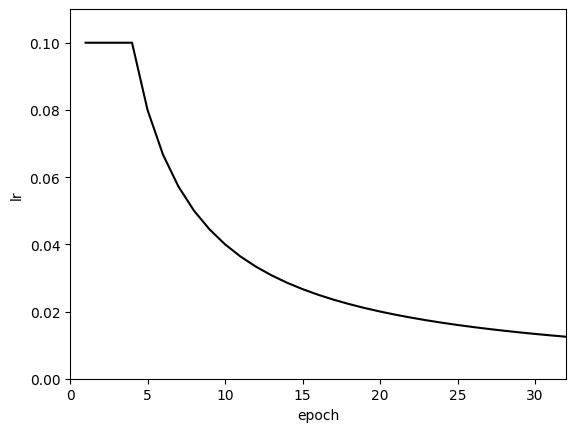

In [7]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.array(out.epoch)
lr_list = []
for t_epoch in epochs:
    lr_list.append(lr_scheduler(t_epoch))
plt.plot(epochs+1.0, lr_list, 'k-')
plt.ylabel("lr")
plt.xlabel("epoch")
plt.axis([0,len(out.epoch), 0, 0.11])
plt.show()

绘制训练过程

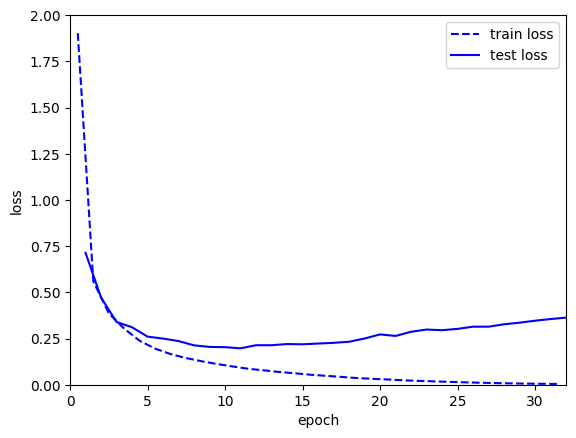

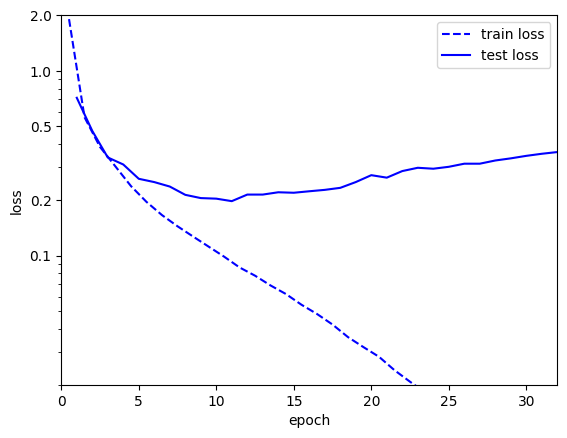

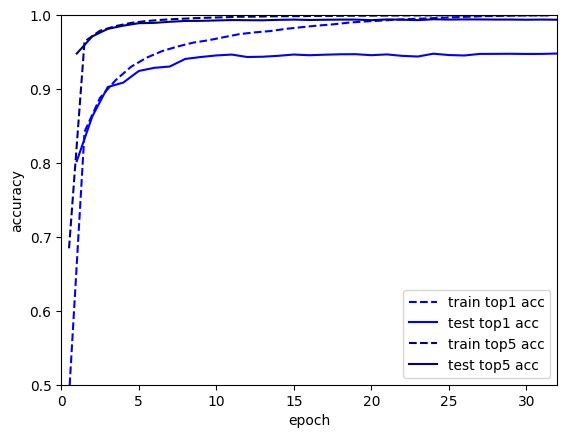

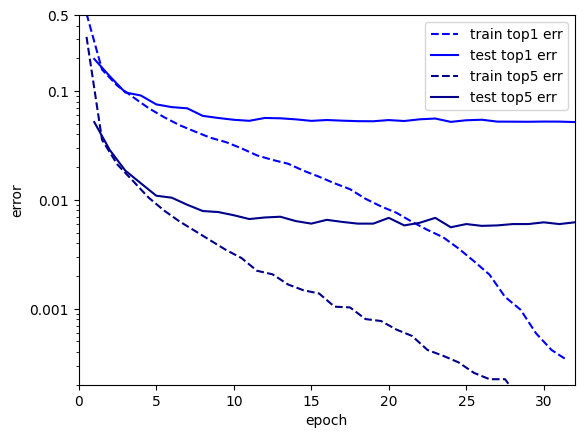

In [11]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.array(out.epoch)
plt.plot(epochs+0.5, out.history['loss'], 'b--', label='train loss')
plt.plot(epochs+1.0, out.history['val_loss'], 'b-', label='test loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.axis([0, len(epochs), 0, 2.0])
plt.legend()
plt.show()

plt.semilogy(epochs+0.5, out.history['loss'], 'b--', label='train loss')
plt.semilogy(epochs+1.0, out.history['val_loss'], 'b-', label='test loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.axis([0, len(epochs), 0.02, 2.0])
plt.yticks([0.1, 0.2, 0.5, 1.0, 2.0], ['0.1', '0.2', '0.5', '1.0', '2.0'])
plt.legend()
plt.show()


plt.plot(epochs+0.5, out.history['accuracy'], 'b--', label='train top1 acc')
plt.plot(epochs+1.0, out.history['val_accuracy'], 'b-', label='test top1 acc')
plt.plot(epochs+0.5, out.history['top5_accuracy'], color='darkblue', linestyle='--', label='train top5 acc')
plt.plot(epochs+1.0, out.history['val_top5_accuracy'], color='darkblue', linestyle='-', label='test top5 acc')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.axis([0, len(epochs), 0.5, 1.0])
plt.legend()
plt.show()

plt.semilogy(epochs+0.5, 1.0-np.array(out.history['accuracy']), 'b--', label='train top1 err')
plt.semilogy(epochs+1.0, 1.0-np.array(out.history['val_accuracy']), 'b-', label='test top1 err')
plt.semilogy(epochs+0.5, 1.0-np.array(out.history['top5_accuracy']), color='darkblue', linestyle='--', label='train top5 err')
plt.semilogy(epochs+1.0, 1.0-np.array(out.history['val_top5_accuracy']), color='darkblue', linestyle='-', label='test top5 err')
plt.ylabel("error")
plt.xlabel("epoch")
plt.yticks([0.001, 0.01, 0.1, 0.5], ['0.001', '0.01', '0.1', '0.5'])
plt.axis([0, len(epochs), 0.0002, 0.5])
plt.legend()
plt.show()

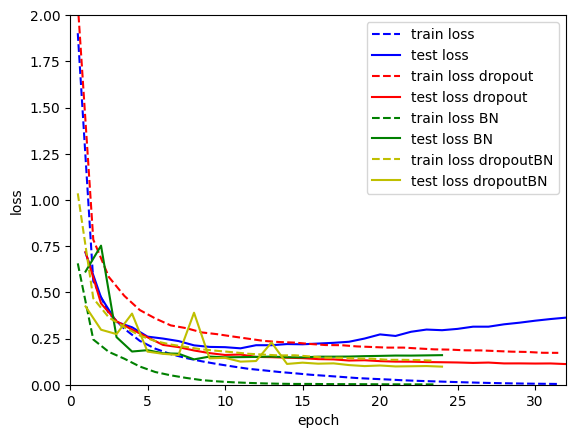

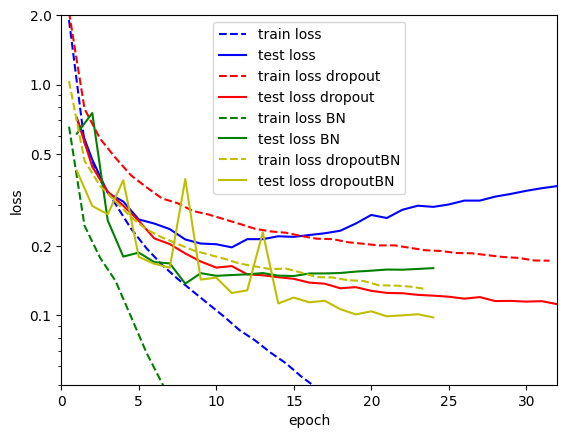

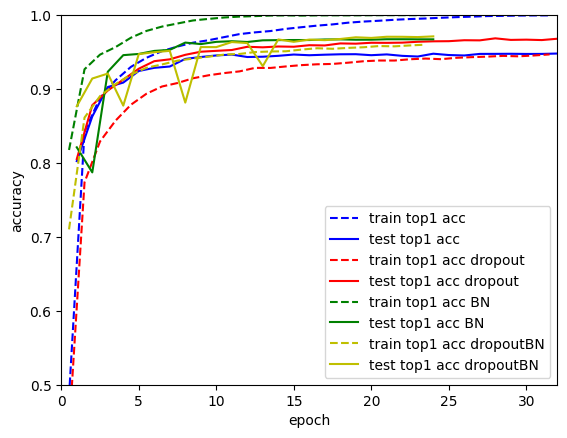

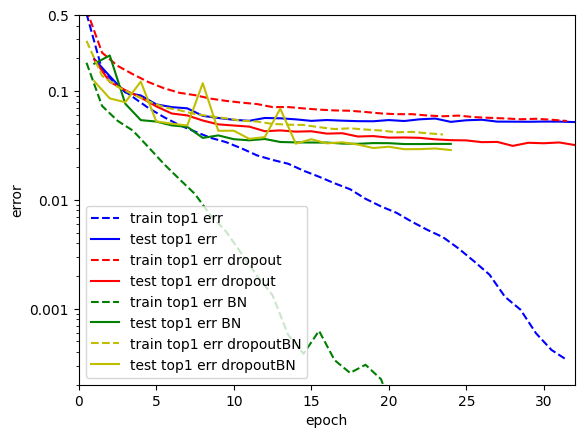

In [16]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.array(out.epoch)
epochs_dropout = np.array(out_dropout.epoch)
epochs_BN = np.array(out_BN.epoch)
epochs_dropoutBN = np.array(out_dropoutBN.epoch)
plt.plot(epochs+0.5, out.history['loss'], 'b--', label='train loss')
plt.plot(epochs+1.0, out.history['val_loss'], 'b-', label='test loss')
plt.plot(epochs_dropout+0.5, out_dropout.history['loss'], 'r--', label='train loss dropout')
plt.plot(epochs_dropout+1.0, out_dropout.history['val_loss'], 'r-', label='test loss dropout')
plt.plot(epochs_BN+0.5, out_BN.history['loss'], 'g--', label='train loss BN')
plt.plot(epochs_BN+1.0, out_BN.history['val_loss'], 'g-', label='test loss BN')
plt.plot(epochs_dropoutBN+0.5, out_dropoutBN.history['loss'], 'y--', label='train loss dropoutBN')
plt.plot(epochs_dropoutBN+1.0, out_dropoutBN.history['val_loss'], 'y-', label='test loss dropoutBN')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.axis([0, max(len(epochs), len(epochs_dropout), len(epochs_BN)), 0, 2.0])
plt.legend()
plt.show()

plt.semilogy(epochs+0.5, out.history['loss'], 'b--', label='train loss')
plt.semilogy(epochs+1.0, out.history['val_loss'], 'b-', label='test loss')
plt.semilogy(epochs_dropout+0.5, out_dropout.history['loss'], 'r--', label='train loss dropout')
plt.semilogy(epochs_dropout+1.0, out_dropout.history['val_loss'], 'r-', label='test loss dropout')
plt.semilogy(epochs_BN+0.5, out_BN.history['loss'], 'g--', label='train loss BN')
plt.semilogy(epochs_BN+1.0, out_BN.history['val_loss'], 'g-', label='test loss BN')
plt.semilogy(epochs_dropoutBN+0.5, out_dropoutBN.history['loss'], 'y--', label='train loss dropoutBN')
plt.semilogy(epochs_dropoutBN+1.0, out_dropoutBN.history['val_loss'], 'y-', label='test loss dropoutBN')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.axis([0, max(len(epochs), len(epochs_dropout), len(epochs_BN)), 0.05, 2.0])
plt.yticks([0.1, 0.2, 0.5, 1.0, 2.0], ['0.1', '0.2', '0.5', '1.0', '2.0'])
plt.legend()
plt.show()


plt.plot(epochs+0.5, out.history['accuracy'], 'b--', label='train top1 acc')
plt.plot(epochs+1.0, out.history['val_accuracy'], 'b-', label='test top1 acc')
# plt.plot(epochs+0.5, out.history['top5_accuracy'], color='darkblue', linestyle='--', label='train top5 acc')
# plt.plot(epochs+1.0, out.history['val_top5_accuracy'], color='darkblue', linestyle='-', label='test top5 acc')
plt.plot(epochs_dropout+0.5, out_dropout.history['accuracy'], 'r--', label='train top1 acc dropout')
plt.plot(epochs_dropout+1.0, out_dropout.history['val_accuracy'], 'r-', label='test top1 acc dropout')
# plt.plot(epochs_dropout+0.5, out_dropout.history['top5_accuracy'], color='darkred', linestyle='--', label='train top5 acc dropout')
# plt.plot(epochs_dropout+1.0, out_dropout.history['val_top5_accuracy'], color='darkred', linestyle='-', label='test top5 acc dropout')
plt.plot(epochs_BN+0.5, out_BN.history['accuracy'], 'g--', label='train top1 acc BN')
plt.plot(epochs_BN+1.0, out_BN.history['val_accuracy'], 'g-', label='test top1 acc BN')
# plt.plot(epochs_BN+0.5, out_BN.history['top5_accuracy'], color='darkgreen', linestyle='--', label='train top5 acc BN')
# plt.plot(epochs_BN+1.0, out_BN.history['val_top5_accuracy'], color='darkgreen', linestyle='-', label='test top5 acc BN')
plt.plot(epochs_dropoutBN+0.5, out_dropoutBN.history['accuracy'], 'y--', label='train top1 acc dropoutBN')
plt.plot(epochs_dropoutBN+1.0, out_dropoutBN.history['val_accuracy'], 'y-', label='test top1 acc dropoutBN')
# plt.plot(epochs_dropoutBN+0.5, out_dropoutBN.history['top5_accuracy'], color='darkyellow', linestyle='--', label='train top5 acc dropoutBN')
# plt.plot(epochs_dropoutBN+1.0, out_dropoutBN.history['val_top5_accuracy'], color='darkyellow', linestyle='-', label='test top5 acc dropoutBN')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.axis([0, max(len(epochs), len(epochs_dropout), len(epochs_BN)), 0.5, 1.0])
plt.legend()
plt.show()

plt.semilogy(epochs+0.5, 1.0-np.array(out.history['accuracy']), 'b--', label='train top1 err')
plt.semilogy(epochs+1.0, 1.0-np.array(out.history['val_accuracy']), 'b-', label='test top1 err')
# plt.semilogy(epochs+0.5, 1.0-np.array(out.history['top5_accuracy']), color='darkblue', linestyle='--', label='train top5 err')
# plt.semilogy(epochs+1.0, 1.0-np.array(out.history['val_top5_accuracy']), color='darkblue', linestyle='-', label='test top5 err')
plt.semilogy(epochs_dropout+0.5, 1.0-np.array(out_dropout.history['accuracy']), 'r--', label='train top1 err dropout')
plt.semilogy(epochs_dropout+1.0, 1.0-np.array(out_dropout.history['val_accuracy']), 'r-', label='test top1 err dropout')
# plt.semilogy(epochs_dropout+0.5, 1.0-np.array(out_dropout.history['top5_accuracy']), color='darkred', linestyle='--', label='train top5 err dropout')
# plt.semilogy(epochs_dropout+1.0, 1.0-np.array(out_dropout.history['val_top5_accuracy']), color='darkred', linestyle='-', label='test top5 err dropout')
plt.semilogy(epochs_BN+0.5, 1.0-np.array(out_BN.history['accuracy']), 'g--', label='train top1 err BN')
plt.semilogy(epochs_BN+1.0, 1.0-np.array(out_BN.history['val_accuracy']), 'g-', label='test top1 err BN')
# plt.semilogy(epochs_BN+0.5, 1.0-np.array(out_BN.history['top5_accuracy']), color='darkgreen', linestyle='--', label='train top5 err BN')
# plt.semilogy(epochs_BN+1.0, 1.0-np.array(out_BN.history['val_top5_accuracy']), color='darkgreen', linestyle='-', label='test top5 err BN')
plt.semilogy(epochs_dropoutBN+0.5, 1.0-np.array(out_dropoutBN.history['accuracy']), 'y--', label='train top1 err dropoutBN')
plt.semilogy(epochs_dropoutBN+1.0, 1.0-np.array(out_dropoutBN.history['val_accuracy']), 'y-', label='test top1 err dropoutBN')
# plt.semilogy(epochs_dropoutBN+0.5, 1.0-np.array(out_dropoutBN.history['top5_accuracy']), color='darkyellow', linestyle='--', label='train top5 err dropoutBN')
# plt.semilogy(epochs_dropoutBN+1.0, 1.0-np.array(out_dropoutBN.history['val_top5_accuracy']), color='darkyellow', linestyle='-', label='test top5 err dropoutBN')
plt.ylabel("error")
plt.xlabel("epoch")
plt.yticks([0.001, 0.01, 0.1, 0.5], ['0.001', '0.01', '0.1', '0.5'])
plt.axis([0, max(len(epochs), len(epochs_dropout), len(epochs_BN)), 0.0002, 0.5])
plt.legend()
plt.show()

参数量对模型性能的影响（卷积数目）

In [22]:
from keras import utils

size_list = [8, 12, 16, 24, 32, 48, 64]
param_num_list = []
top1_acc_train_list = []
top5_acc_train_list = []
top1_acc_test_list = []
top5_acc_test_list = []

for t_size in size_list:
    t_model = get_model(t_size, dropout=True, BN=True)
    t_model.compile(loss='categorical_crossentropy', metrics=['accuracy', top5_accuracy], optimizer='sgd')
    param_num_list.append(utils.layer_utils.count_params(t_model.trainable_weights))
    _ = t_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=32, callbacks=[lr_callback], verbose=0)
    _, t_top1_acc, t_top5_acc = t_model.evaluate(x_train, y_train, batch_size=512, verbose=0)
    top1_acc_train_list.append(t_top1_acc)
    top5_acc_train_list.append(t_top5_acc)
    _, t_top1_acc, t_top5_acc = t_model.evaluate(x_test, y_test, batch_size=512, verbose=0)
    top1_acc_test_list.append(t_top1_acc)
    top5_acc_test_list.append(t_top5_acc)

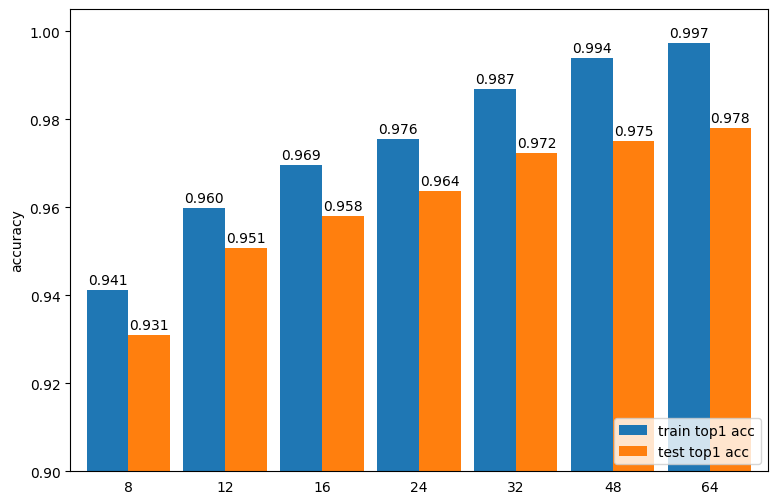

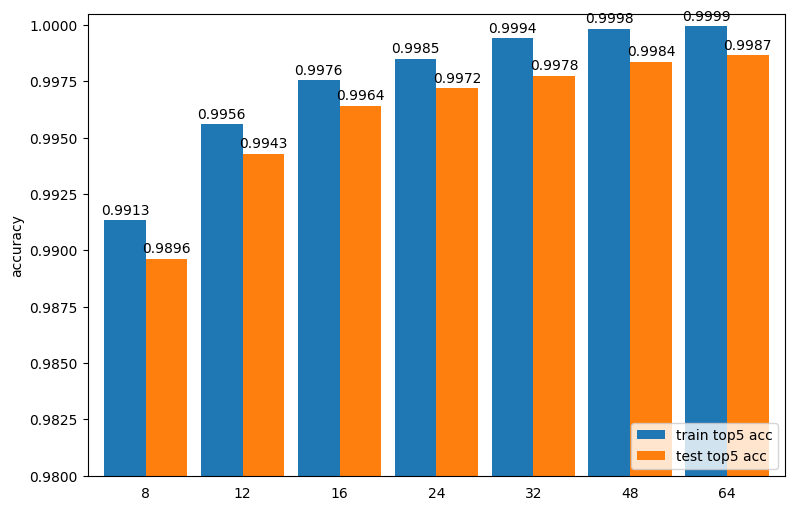

In [23]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.43

plt.figure(figsize=(9,6))
plt.bar_label(plt.bar(np.arange(len(size_list))-width*0.5, top1_acc_train_list, width=width, label='train top1 acc'), fmt='%.3f', padding=2)
plt.bar_label(plt.bar(np.arange(len(size_list))+width*0.5, top1_acc_test_list,  width=width, label='test top1 acc'), fmt='%.3f', padding=2)
plt.xticks([])
for i in range(len(size_list)):
    plt.text(i, 0.898, size_list[i], horizontalalignment='center', verticalalignment='top')
plt.ylabel("accuracy")
plt.axis([-0.5-0.1, len(size_list)-0.5+0.1, 0.9, 1.005])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(9,6))
plt.bar_label(plt.bar(np.arange(len(size_list))-width*0.5, top5_acc_train_list, width=width, label='train top5 acc'), fmt='%.4f', padding=2)
plt.bar_label(plt.bar(np.arange(len(size_list))+width*0.5, top5_acc_test_list,  width=width, label='test top5 acc'), fmt='%.4f', padding=2)
plt.xticks([])
for i in range(len(size_list)):
    plt.text(i, 0.9795, size_list[i], horizontalalignment='center', verticalalignment='top')
plt.ylabel("accuracy")
plt.axis([-0.5-0.1, len(size_list)-0.5+0.1, 0.98, 1.0005])
plt.legend(loc='lower right')
plt.show()

参数量对模型性能的影响（模型层数）

In [25]:
from keras import utils

layer_list = [ 0,  1,  3,  5,  7, 11, 15]
param_num_list_layer = []
top1_acc_train_list_layer = []
top5_acc_train_list_layer = []
top1_acc_test_list_layer = []
top5_acc_test_list_layer = []

for t_layer in layer_list:
    t_model = get_model(16, dropout=True, BN=True, append_layers_1=t_layer//2, append_layers_2=t_layer//2+t_layer%2)
    t_model.compile(loss='categorical_crossentropy', metrics=['accuracy', top5_accuracy], optimizer='sgd')
    param_num_list_layer.append(utils.layer_utils.count_params(t_model.trainable_weights))
    _ = t_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=32, callbacks=[lr_callback], verbose=0)
    _, t_top1_acc, t_top5_acc = t_model.evaluate(x_train, y_train, batch_size=512, verbose=0)
    top1_acc_train_list_layer.append(t_top1_acc)
    top5_acc_train_list_layer.append(t_top5_acc)
    _, t_top1_acc, t_top5_acc = t_model.evaluate(x_test, y_test, batch_size=512, verbose=0)
    top1_acc_test_list_layer.append(t_top1_acc)
    top5_acc_test_list_layer.append(t_top5_acc)

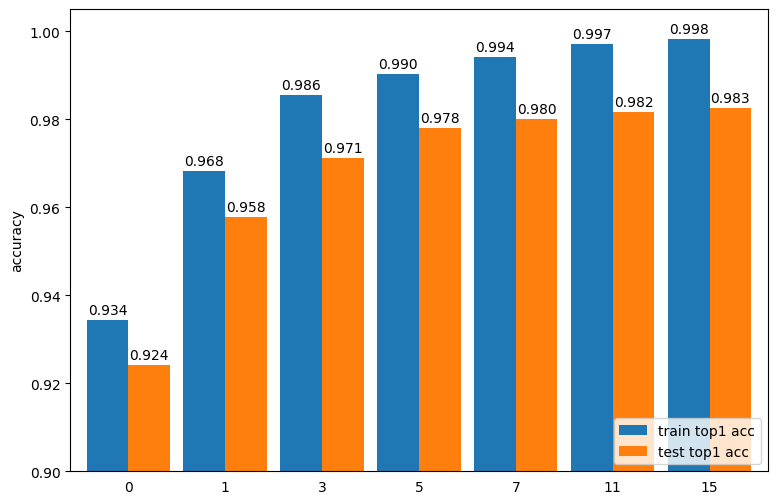

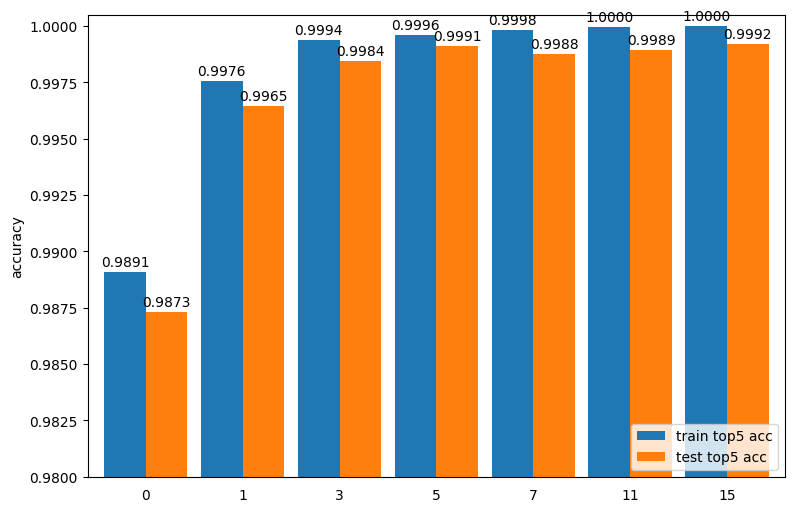

In [26]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.43

plt.figure(figsize=(9,6))
plt.bar_label(plt.bar(np.arange(len(layer_list))-width*0.5, top1_acc_train_list_layer, width=width, label='train top1 acc'), fmt='%.3f', padding=2)
plt.bar_label(plt.bar(np.arange(len(layer_list))+width*0.5, top1_acc_test_list_layer,  width=width, label='test top1 acc'), fmt='%.3f', padding=2)
plt.xticks([])
for i in range(len(layer_list)):
    plt.text(i, 0.898, layer_list[i], horizontalalignment='center', verticalalignment='top')
plt.ylabel("accuracy")
plt.axis([-0.5-0.1, len(layer_list)-0.5+0.1, 0.9, 1.005])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(9,6))
plt.bar_label(plt.bar(np.arange(len(layer_list))-width*0.5, top5_acc_train_list_layer, width=width, label='train top5 acc'), fmt='%.4f', padding=2)
plt.bar_label(plt.bar(np.arange(len(layer_list))+width*0.5, top5_acc_test_list_layer,  width=width, label='test top5 acc'), fmt='%.4f', padding=2)
plt.xticks([])
for i in range(len(layer_list)):
    plt.text(i, 0.9795, layer_list[i], horizontalalignment='center', verticalalignment='top')
plt.ylabel("accuracy")
plt.axis([-0.5-0.1, len(layer_list)-0.5+0.1, 0.98, 1.0005])
plt.legend(loc='lower right')
plt.show()

绘制结果随参数的变化

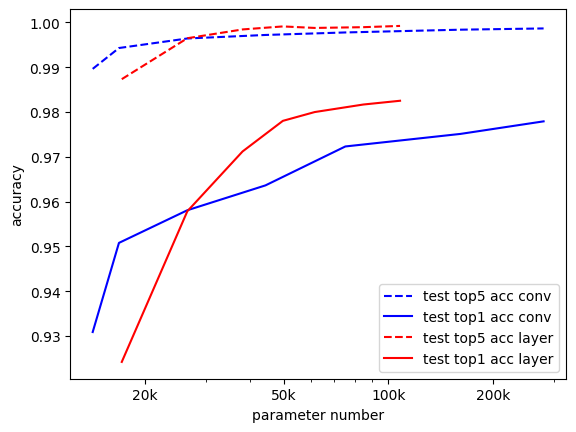

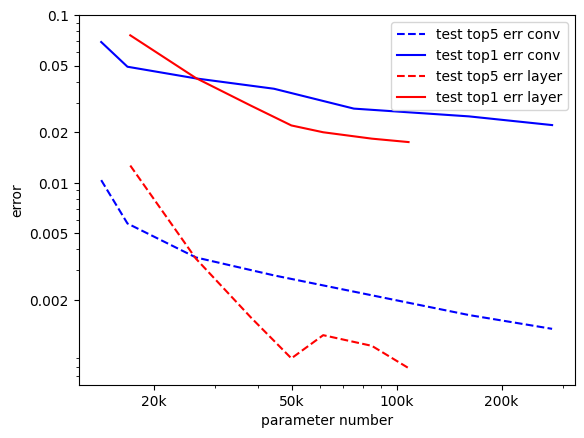

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.semilogx(param_num_list, top5_acc_test_list, 'b--', label='test top5 acc conv')
plt.semilogx(param_num_list, top1_acc_test_list, 'b-', label='test top1 acc conv')
plt.semilogx(param_num_list_layer, top5_acc_test_list_layer, 'r--', label='test top5 acc layer')
plt.semilogx(param_num_list_layer, top1_acc_test_list_layer, 'r-', label='test top1 acc layer')
plt.ylabel("accuracy")
plt.xlabel("parameter number")
plt.xticks([20000, 50000, 100000, 200000], ['20k', '50k', '100k', '200k'])
plt.legend()
plt.show()

plt.loglog(param_num_list, 1.0-np.array(top5_acc_test_list), 'b--', label='test top5 err conv')
plt.loglog(param_num_list, 1.0-np.array(top1_acc_test_list), 'b-', label='test top1 err conv')
plt.loglog(param_num_list_layer, 1.0-np.array(top5_acc_test_list_layer), 'r--', label='test top5 err layer')
plt.loglog(param_num_list_layer, 1.0-np.array(top1_acc_test_list_layer), 'r-', label='test top1 err layer')
plt.ylabel("error")
plt.xlabel("parameter number")
plt.yticks([0.002, 0.005, 0.01, 0.02, 0.05, 0.1], ['0.002', '0.005', '0.01', '0.02', '0.05', '0.1'])
plt.xticks([20000, 50000, 100000, 200000], ['20k', '50k', '100k', '200k'])
plt.legend()
plt.show()